<a href="https://colab.research.google.com/github/sarthakPatil96K/Anime_stream/blob/main/End_to_end_dog_breed_indentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end multi breed dog classificatoin
This notebook builds an end-to-end multi-class image classifier using TensorFlow and TensorFlow Hub.
## Problem
## Data
## Evaluation
## Features


In [ ]:
#!unzip "/content/drive/MyDrive/dog vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog vision/"

### Get our workspace ready

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ",tf.__version__)
print("TF hub version:",hub.__version__)
print("GPU","IS AVAILABLE (YES!!!!!)" if tf.config.list_physical_devices("GPU") else "Not available :(")

TF version:  2.18.0
TF hub version: 0.16.1
GPU IS AVAILABLE (YES!!!!!)


## Getting our data ready.

In [4]:
labels = pd.read_csv("/content/drive/MyDrive/dog vision/labels.csv")
print(labels.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


In [5]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
labels["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
komondor,67
brabancon_griffon,67


<Axes: xlabel='breed'>

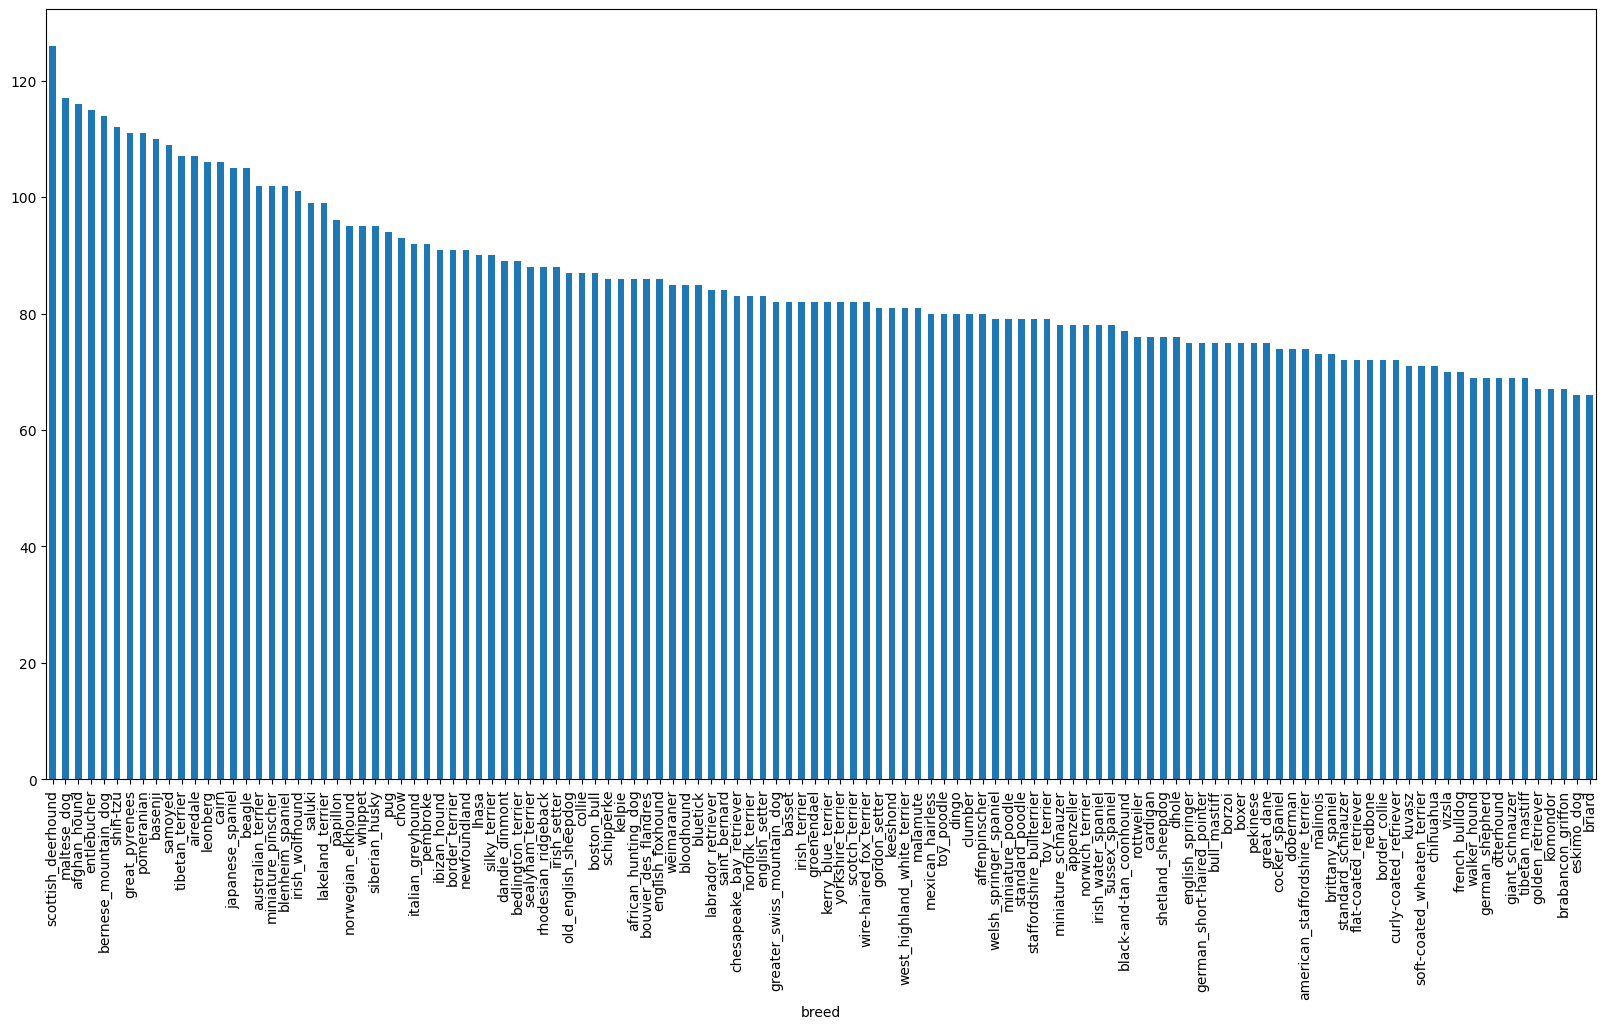

In [7]:
labels["breed"].value_counts().plot.bar(figsize=(20,10))

In [8]:
labels["breed"].value_counts().median()

82.0

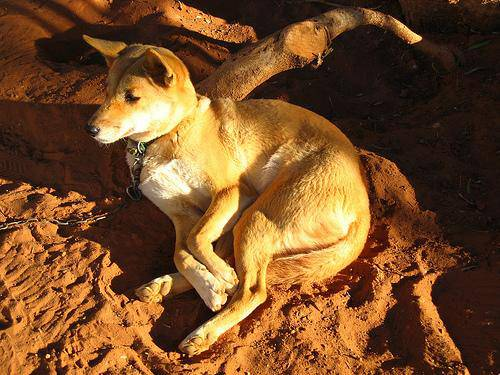

In [9]:
from IPython.display import Image
#/content/drive/MyDrive/dog vision/train
Image("/content/drive/MyDrive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## creating file path names and storing into a list

In [10]:


filenames = ["/content/drive/MyDrive/dog vision/train/"+fname +".jpg"for fname in labels['id']]
filenames[:10]

['/content/drive/MyDrive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
import os
if len(os.listdir("/content/drive/MyDrive/dog vision/train/"))==len(filenames):
  print("length matched")
else:
  print("Length did not matched")

length matched


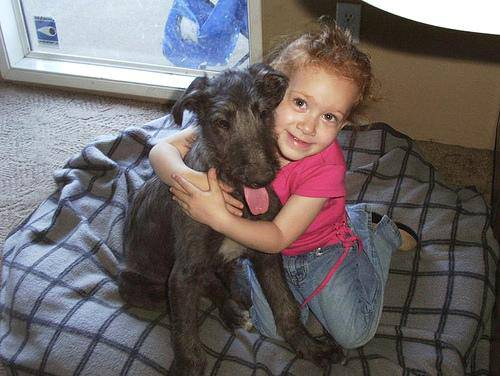

In [12]:
Image(filenames[8463])

In [13]:
labels['breed'][8463]

'scottish_deerhound'

let's prepare our labels

In [14]:
label = labels['breed']
label = np.array(label)
label

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(label)

10222

In [16]:
if len(filenames) == len(label):
  print("Length matched")
else :
  print("not matched")

Length matched


In [17]:
unique_breeds = np.unique(label)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [18]:
len(unique_breeds)


120

In [19]:
boolean_labels = [label == unique_breeds for label in label]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [20]:
 # x and y variables
 x = filenames
 y = boolean_labels

We're going to start off experimentign with 10000 images and increase as needed

In [21]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [22]:
# data splitting into test and validation sets
from sklearn.model_selection import train_test_split

# splitting data
x_train,x_valid,y_train,y_valid = train_test_split(x[:NUM_IMAGES],
                                                   y[:NUM_IMAGES],
                                                   test_size =0.2,
                                                   random_state = 42)
len(x_train),len(x_valid),len(y_train),len(y_valid)

(800, 200, 800, 200)

In [23]:
x_train[:5],y_train[:2]

(['/content/drive/MyDrive/dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

## Preprocessing images (into tensors)
To preprocess our images into Tensors we're going to write a function which does few things:
1. take an image filepath as input
2. use tensorFlow to read the file and save it to a variable, image
3. turn our image into tensors
4. resize the image to be ashape of (224,224)
5. return the modified image

array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]],

       [[ 99,  98,  93],
        [ 99,  98,  93],
        [102, 101,  96],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[193, 192, 188],
        [194, 193, 189],
        [195, 194, 190],
        ...,
        [118, 117, 113],
        [130, 129, 127],
        [128, 127, 123]],

       [[199, 198, 194],
        [200, 199, 195],
        [201, 200, 196],
        ...,
        [116, 115, 110],
        [107, 106, 102],
        [108, 107, 102]],

       [[199, 198, 194],
        [200, 199, 195],
        [202, 201, 197],
        ...,
        [ 96,  96,  88],
        [ 93,  92,  87],
        [107, 107,  99]]], dtype=uint8)
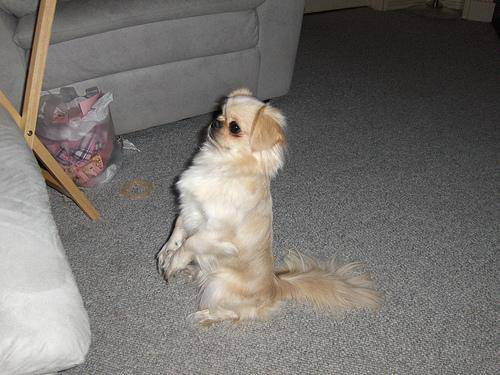

In [24]:
Image(filenames[2])
from matplotlib.pyplot import imread
image =  imread(filenames[2])
image

In [25]:
IMG_SIZE = 224
def process_image(image_path):
  """
  """
  # Read in an image  file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with 3 colors channels(red,green,blue)
  image= tf.image.decode_jpeg(image,channels=3)
  # convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # resize the image to our desired valume (224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

## Turning our data into batches.
Suggested size of one batch is 32

In [26]:
# creating a simple function to return a tuple (image, label)
def get_image_data(image_path,label):

  image = process_image(image_path)
  return image, label

In [27]:
get_image_data(x_train[1],y_train[1])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.18755254, 0.21500352, 0.24637607],
         [0.1764706 , 0.20050772, 0.23461136],
         [0.17305672, 0.18089986, 0.2279587 ],
         ...,
         [0.44908977, 0.5404238 , 0.43163532],
         [0.42711818, 0.5011202 , 0.43802518],
         [0.40852585, 0.4754201 , 0.43529415]],
 
        [[0.16093954, 0.18839052, 0.21976307],
         [0.15317924, 0.17825271, 0.21183819],
         [0.15481427, 0.16688253, 0.21182881],
         ...,
         [0.4626288 , 0.55693907, 0.4591917 ],
         [0.3884407 , 0.46787694, 0.4117706 ],
         [0.36634105, 0.44199118, 0.40501413]],
 
        [[0.13412693, 0.16599749, 0.19985214],
         [0.13486801, 0.16027068, 0.19756654],
         [0.14402403, 0.15743439, 0.20170961],
         ...,
         [0.25783715, 0.36013058, 0.282312  ],
         [0.2909582 , 0.38303342, 0.3436311 ],
         [0.30534175, 0.39550284, 0.37139183]],
 
        ...,
 
        [[0.5555578 , 0.67555076

In [28]:
Batch_size = 32
def create_data_batches(x,y=None,batch_size=Batch_size,valid_data=False,test_data=False):
  """
  Creates batches of data out of the images(x) and label(y) pairs.
  shuffles the data if it's traingin data but doesn't shuffle if it's validation data.
  alse accepts test data as input(no labels).
  """
  # if the data is a test daataset, we probably don't have labels.
  if test_data:
    print("creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x)) # only filepaths (no labels)
    data_batch=data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    print("creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # only filepaths (no labels)
    data_batch=data.map(get_image_data).batch(batch_size)
    return data_batch

  else:
    print("Creating trainging data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    # Shuffling pathnames and labels before mapping images processsor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))
    # ceate tuples
    data = data.map(get_image_data)
    # turn the training data into batches
    data_batch = data.batch(batch_size)

  return data_batch

In [29]:

train_data = create_data_batches(x_train,y_train)
valid_data = create_data_batches(x_valid,y_valid,valid_data=True)

Creating trainging data batches...
creating test data batches...


In [30]:
# checking different attributes of data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## visualizing data batches


In [31]:
def show_25_images(images,labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax =  plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [32]:
train_images, train_labels =  next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          ...,
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ]],
 
         [[0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          ...,
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ]],
 
         [[0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          ...,
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ],
          [0.6       , 0.5529412 , 0.5058824 ]],
 
         ...,
 
         [[0.6       , 0.5529412 , 0.5058824 ],
          [0.6    

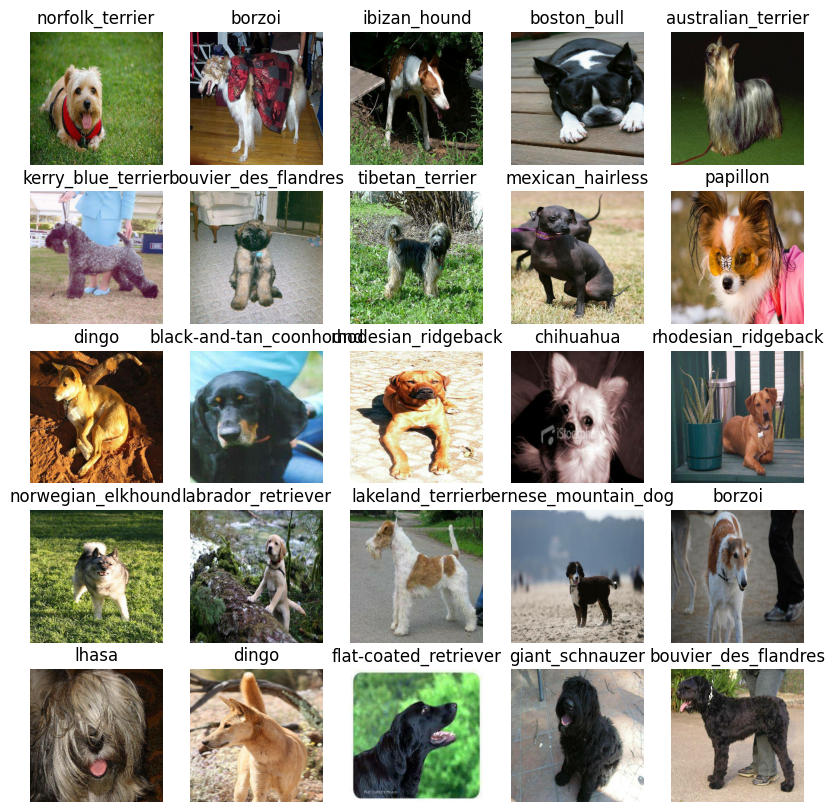

In [33]:




train_images, train_labels =  next(train_data.as_numpy_iterator())

show_25_images(train_images,train_labels)

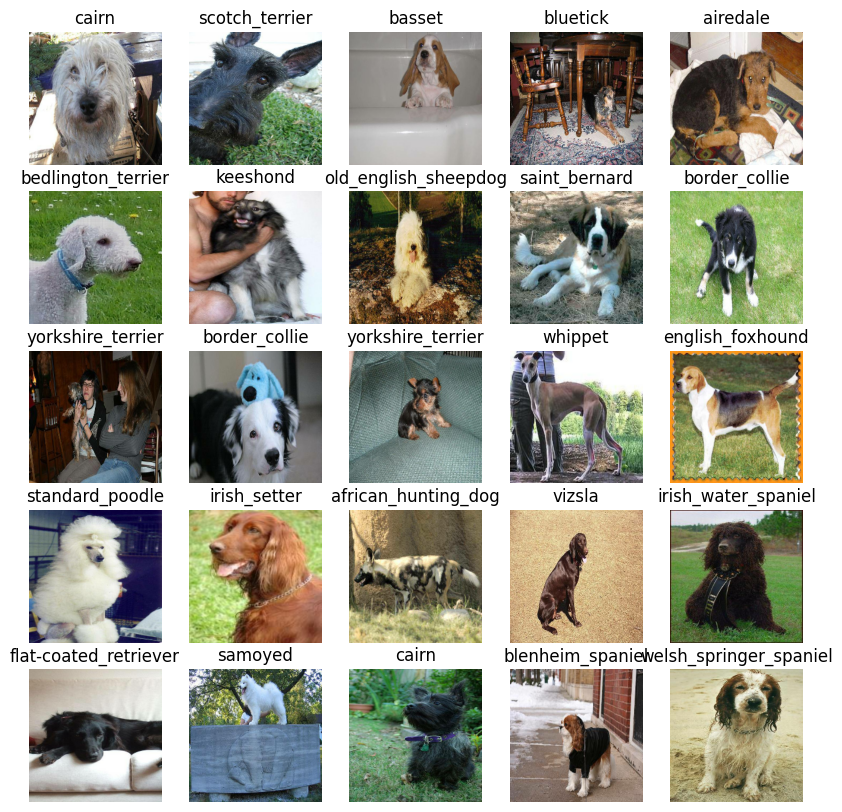

In [34]:
val_images, val_labels =  next(valid_data.as_numpy_iterator())

show_25_images(val_images,val_labels)

## Building the model

In [35]:
# # Setup input shape to the model
# INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

# # Setup output shape of our model
# OUTPUT_SHAPE = len(unique_breeds)

# # Setup model URL from TensorFlow Hub
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4"

# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  # Make sure IMG_SIZE is defined (should be 224 for this model)

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)  # Make sure unique_breeds is defined

# Setup model URL from TensorFlow Hub
# Using the latest recommended version from the TensorFlow Hub documentation
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5"

now we've got our inputs, outputs, and model ready to go.

In [36]:
# crate a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):

  print(f"Building model with: {model_url}")

  model = tf.keras.Sequential([hub.KerasLayer(model_url), # Layer 1
                               tf.keras.layers.Dense(units= output_shape,
                                                     activation="softmax") # Layer 2
                               ])
  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # build the model
  model.build(input_shape)
  return model
import tensorflow as tf
import tensorflow_hub as hub

def create_model():
    print("Building MobileNetV2 model with fixed architecture")

    # Model parameters
    INPUT_SHAPE = (224, 224, 3)  # Must match model expectations
    OUTPUT_SHAPE = 120            # Number of classes

    # Option 1: Use the official Keras application (recommended)
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=INPUT_SHAPE,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    # Option 2: If you specifically need the TF Hub version
    # model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"
    # base_model = hub.KerasLayer(model_url, input_shape=INPUT_SHAPE, trainable=False)

    # Build model
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE),
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(OUTPUT_SHAPE, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

# Create and verify model
model = create_model()
model.summary()

Building MobileNetV2 model with fixed architecture
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,411,704 (9.20 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 2,257,984 (8.61 MB)